In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('User_Data.csv')
#This dataset contains information of users from a companies database. It contains information about UserID, 
#Gender, Age, EstimatedSalary, Purchased. 
#We are using this dataset for predicting that a user will purchase the company’s newly launched product or not.

In [3]:
dataset.shape

(400, 5)

In [4]:
pd.set_option('display.max_rows', 400)
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [5]:
dataset.describe(include='all')

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400,400.000000,400.000000,400.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,204,NaN,NaN,NaN
mean,1.569154e+07,NaN,37.655000,69742.500000,0.357500
std,7.165832e+04,NaN,10.482877,34096.960282,0.479864
min,1.556669e+07,NaN,18.000000,15000.000000,0.000000
25%,1.562676e+07,NaN,29.750000,43000.000000,0.000000
50%,1.569434e+07,NaN,37.000000,70000.000000,0.000000
75%,1.575036e+07,NaN,46.000000,88000.000000,1.000000


In [6]:
dataset.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [7]:
dataset.nunique()

User ID            400
Gender               2
Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64

In [8]:
dataset.isnull().values.any() 

False

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


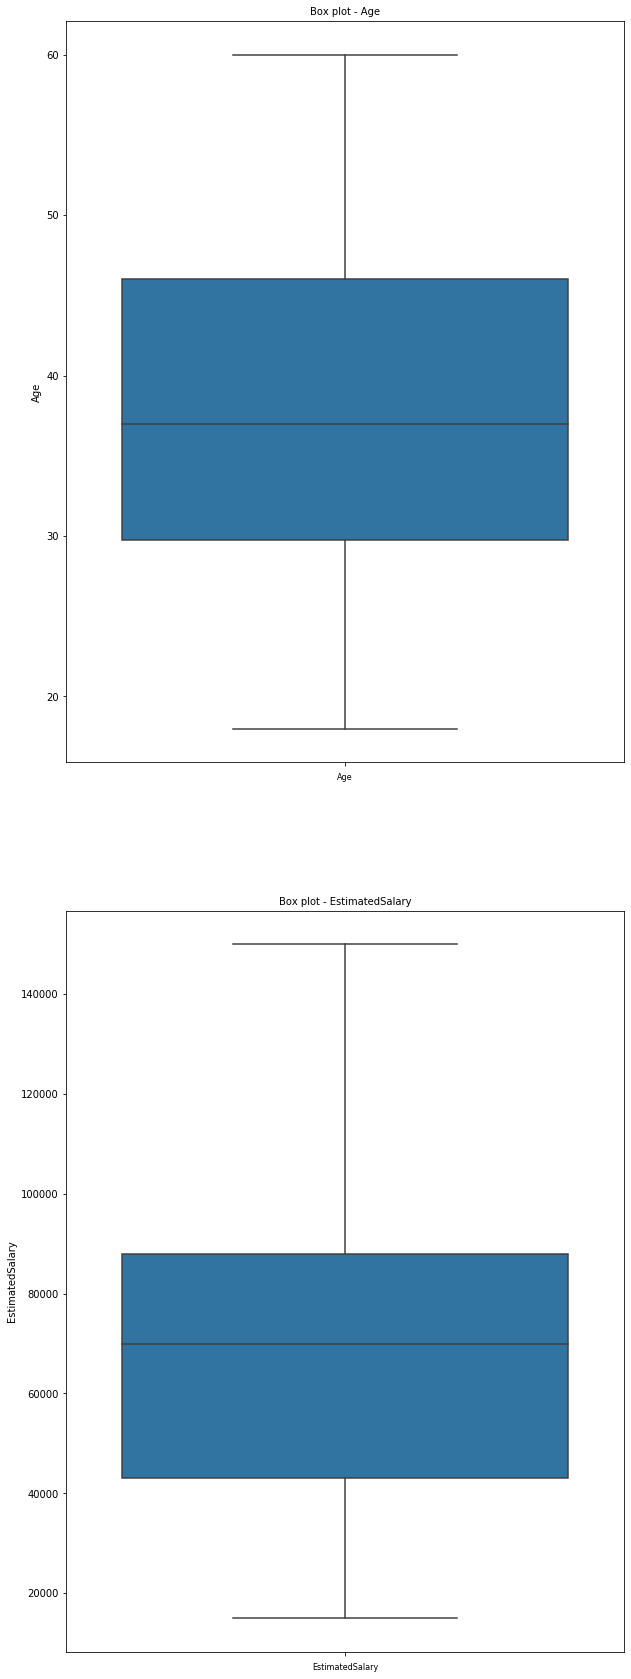

In [10]:
#Outlier Detection Analysis using box plot
col_names = ['Age','EstimatedSalary']
fig, ax = plt.subplots(len(col_names), figsize=(10,30))
for i, col_val in enumerate(col_names):
    sns.boxplot(y=dataset[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    
#No outliers detected

In [11]:
#correlation plot
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm') #age and userid are less correlated

,User ID,Age,EstimatedSalary,Purchased
User ID,1,-0.000721104,0.0710973,0.00712018
Age,-0.000721104,1,0.155238,0.622454
EstimatedSalary,0.0710973,0.155238,1,0.362083
Purchased,0.00712018,0.622454,0.362083,1


Text(0, 0.5, 'Frequency of Purchase')

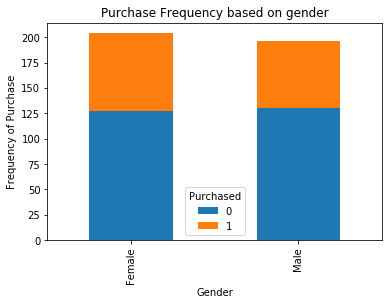

In [14]:
#Visualizations
pd.crosstab(dataset.Gender,dataset.Purchased).plot(kind='bar',stacked=True)
plt.title('Purchase Frequency based on gender')
plt.xlabel('Gender')
plt.ylabel('Frequency of Purchase')

#The gender does not seem a strong predictor for the outcome variable.

Text(0, 0.5, 'Frequency of Purchase')

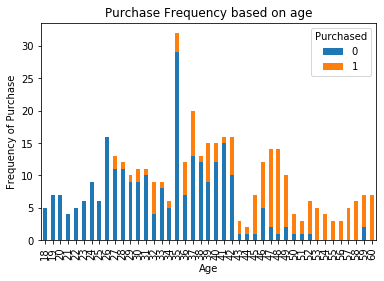

In [15]:
pd.crosstab(dataset.Age,dataset.Purchased).plot(kind='bar',stacked=True)
plt.title('Purchase Frequency based on age')
plt.xlabel('Age')
plt.ylabel('Frequency of Purchase')
#Age seem to be good predictor

Text(0, 0.5, 'Frequency')

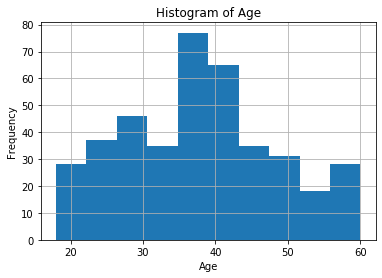

In [16]:
dataset.Age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

#Most of the users in this dataset are in the age range of 35–45

Text(0, 0.5, 'Frequency of Purchase')

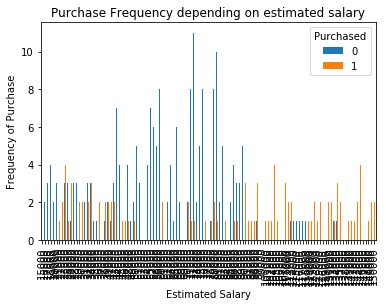

In [18]:
pd.crosstab(dataset.EstimatedSalary,dataset.Purchased).plot(kind='bar')
plt.title('Purchase Frequency depending on estimated salary')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency of Purchase')
#Estimated Salary seem to be good predictor

In [21]:
#Data Exploration
dataset['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

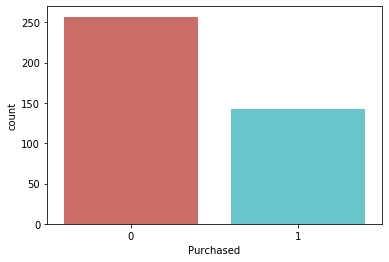

In [22]:
sns.countplot(x='Purchased',data=dataset, palette='hls')
plt.show()

In [23]:
#Now, to predict whether a user will purchase the product or not, one needs to find out the relationship 
#between Age and Estimated Salary. Here User ID and Gender are not important factors for finding out this.

# input 
x = dataset.iloc[:, [2, 3]].values 
  
# output 
y = dataset.iloc[:, 4].values

In [24]:
#Implementing the Model
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.686532
         Iterations 3
                        Results: Logit
Model:              Logit            Pseudo R-squared: -0.053  
Dependent Variable: y                AIC:              553.2253
Date:               2020-03-01 16:43 BIC:              561.2082
No. Observations:   400              Log-Likelihood:   -274.61 
Df Model:           1                LL-Null:          -260.79 
Df Residuals:       398              LLR p-value:      1.0000  
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     3.0000                                     
-----------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
-----------------------------------------------------------------
x1       -0.0054     0.0055   -0.9815   0.3263   -0.0162   0.0054
x2       -0.0000     0.0000   -0.1002   0.9202   -0.0000   0.0000



In [25]:
#Splitting the dataset to train and test. 
#75% of data is used for training the model and 25% of it is used to test the performance of our model.

from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [26]:
#Perform feature scaling

#Because Age and Estimated Salary values lie in different ranges. 
#If we don’t scale the features, then Estimated Salary feature will dominate Age feature when the model 
#finds the nearest neighbor to a data point in data space.

from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest) 

print (xtrain[0:20, :])

#Here, notice that Age and Estimated salary features values are scaled and now they are in the -1 to 1. 
#Hence, each feature will contribute equally in decision making i.e. finalizing the hypothesis.

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]
 [-0.30964085 -1.29261101]
 [-0.30964085 -0.5677824 ]
 [ 0.38358493  0.09905991]
 [ 0.8787462  -0.59677555]
 [ 2.06713324 -1.17663843]
 [ 1.07681071 -0.13288524]
 [ 0.68068169  1.78066227]
 [-0.70576986  0.56295021]
 [ 0.77971394  0.35999821]
 [ 0.8787462  -0.53878926]]


In [27]:
#Training our Logistic Regression model
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0) 
classifier.fit(xtrain, ytrain)

/Volumes/MacintoshHD/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
#prediction on testing data
y_pred = classifier.predict(xtest) 

In [29]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(ytest, y_pred) 

print ("Confusion Matrix : \n", cm)

#Out of 100 :
#TruePositive + TrueNegative = 65 + 24
#FalsePositive + FalseNegative = 3 + 8

Confusion Matrix : 
 [[65  3]
 [ 8 24]]


In [30]:
#Performance measure – Accuracy
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(ytest, y_pred)) 

Accuracy :  0.89


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


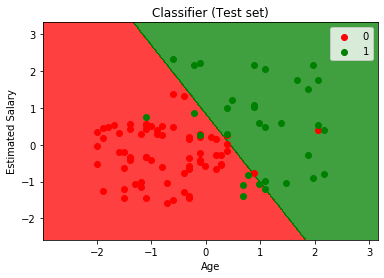

In [31]:
#Visualizing the performance of our model

from matplotlib.colors import ListedColormap 
X_set, y_set = xtest, ytest 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01)) 

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape( X1.shape), alpha = 0.75, 
             cmap = ListedColormap(('red', 'green'))) 

plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 

for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
    c = ListedColormap(('red', 'green'))(i), label = j) 

plt.title('Classifier (Test set)') 
plt.xlabel('Age') 
plt.ylabel('Estimated Salary') 
plt.legend() 
plt.show()

In [32]:
#Analysing the performance measures – accuracy and confusion matrix and the graph, 
#we can clearly say that our model is performing really good.

In [33]:
#Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



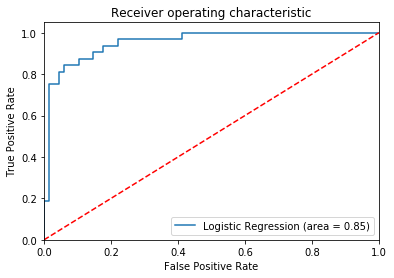

In [34]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(ytest, classifier.predict(xtest))
fpr, tpr, thresholds = roc_curve(ytest, classifier.predict_proba(xtest)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

#The dotted line represents the ROC curve of a classifier
#A good classifier stays as far away from that line as possible (toward the top-left corner)